In [946]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fft as fft
from matplotlib.ticker import FixedLocator

In [947]:
# gaussian in xy plane
def gaussian(x, y, x0, y0, sigma):
    return np.exp(-((x-x0)**2 + (y-y0)**2) / (2*sigma**2))

In [948]:
# fourier transform returns the amplitude and phase
def fourier_transform(f):
    F = fft.fftn(f, norm='backward')
    F = fft.fftshift(F)
    F_amp = np.abs(F)
    F_phase = np.arctan(np.imag(F)/np.real(F))
    return F_amp, F_phase

In [ ]:
# plot next to each other amplitude of function, amplitude of fourier transform and phase of fourier transform
def plot(f, F, X, Y, x_lim=None, kx_lim=None, interpolate_plot=False):
    fig, axs = plt.subplots(1, 4, figsize=(22.5, 4.5))

    lw = 0.2

    x_max = X.max()
    x_min = X.min()
    y_max = Y.max()
    y_min = Y.min()

    Nx = X.shape[1]
    Ny = X.shape[0]

    kx_max = np.pi / (x_max-x_min) * Ny
    kx_min = -kx_max
    ky_max = np.pi / (y_max-y_min) * Ny
    ky_min = -ky_max

    kx = np.linspace(kx_min, kx_max, Ny)
    ky = np.linspace(ky_min, ky_max, Ny)
    KX, KY = np.meshgrid(kx, ky)

    if interpolate_plot:
        plot = axs[0].contourf(X, Y, f, 100, cmap='berlin', vmin=-np.max(np.abs(f)), vmax=np.max(np.abs(f)))
    else:
        plot = axs[0].pcolormesh(X, Y, f, cmap='berlin', shading='auto', vmin=-np.max(np.abs(f)), vmax=np.max(np.abs(f)))

    axs[0].set_title('f(x,y)')
    axs[0].set_xlabel(r'$x (\mathrm{\AA})$', fontsize=11)
    axs[0].set_ylabel(r'$y (\mathrm{\AA})$', fontsize=11)
    # add a colorbar
    fig.colorbar(plot)
    # white lines for x and y axis
    axs[0].axhline(0, color='white', lw=lw)
    axs[0].axvline(0, color='white', lw=lw)
    axs[0].set_aspect('equal', 'box')
    if x_lim:
        axs[0].set_xlim(-x_lim, x_lim)
        axs[0].set_ylim(-x_lim, x_lim)
    else:
        axs[0].set_xlim(x_min, x_max)
        axs[0].set_ylim(y_min, y_max)

    if interpolate_plot:
        plot = axs[1].contourf(KX, KY, F[0], 100, cmap='viridis')
    else:
        plot = axs[1].pcolormesh(KX, KY, F[0], cmap='viridis', shading='auto')
    axs[1].set_title('abs(FFT(f))')
    axs[1].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[1].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # add a colorbar
    fig.colorbar(plot)
    # white lines for x and y axis
    axs[1].axhline(0, color='white', lw=lw)
    axs[1].axvline(0, color='white', lw=lw)
    axs[1].set_aspect('equal', 'box')
    
    if kx_lim:
        axs[1].set_xlim(-kx_lim, kx_lim)
        axs[1].set_ylim(-kx_lim, kx_lim)
    else:
        axs[1].set_xlim(kx_min, kx_max)
        axs[1].set_ylim(ky_min, ky_max)


    if interpolate_plot:
        plot = axs[2].contourf(KX, KY, np.multiply(F[1], F[0]/np.max(F[0])), levels=np.linspace(-np.pi/2-1e-3, np.pi/2+1e-3, 101), cmap='coolwarm', vmin=-np.pi, vmax=np.pi)
    else:
        plot = axs[2].pcolormesh(KX, KY, np.multiply(F[1], F[0]/np.max(F[0])), cmap='coolwarm', shading='auto', vmin=-np.pi, vmax=np.pi)

    axs[2].set_title('arg(FFT(f)) * abs(FFT(f))/max(abs(FFT(f)))')
    axs[2].set_xlabel(r'$k_x (\mathrm{\AA}^{-1})$', fontsize=11)
    axs[2].set_ylabel(r'$k_y (\mathrm{\AA}^{-1})$', fontsize=11)
    # aspect ratio equal
    axs[2].set_aspect('equal')
    # add a colorbar
    cbar = fig.colorbar(plot)
    cbar.set_ticks([-np.pi/2, 0, np.pi/2])
    cbar.set_ticklabels([r'$-\pi/2$', r'$0$', r'$\pi/2$'])
    # cbar limits
    # cbar has no attribute set_clim !!!
    if kx_lim:
        axs[2].set_xlim(-kx_lim, kx_lim)
        axs[2].set_ylim(-kx_lim, kx_lim)

    # calculate the inverse fourier transform
    f_inv = fft.ifftn(F[0]*np.exp(1j*F[1]), norm='backward')
    f_inv = fft.fftshift(f_inv)

    if interpolate_plot:
        plot = axs[3].contourf(X, Y, np.abs(f_inv), 100, cmap='berlin', vmin=-np.max(np.abs(f)), vmax=np.max(np.abs(f)))
    else:
        plot = axs[3].pcolormesh(X, Y, np.abs(f_inv), cmap='berlin', shading='auto', vmin=-np.max(np.abs(f)), vmax=np.max(np.abs(f)))
    axs[3].set_title('IFFT(FFT(f))')
    axs[3].set_xlabel(r'$x (\mathrm{\AA})$', fontsize=11)
    axs[3].set_ylabel(r'$y (\mathrm{\AA})$', fontsize=11)
    # add a colorbar
    fig.colorbar(plot)
    # white lines for x and y axis
    axs[3].axhline(0, color='white', lw=lw)
    axs[3].axvline(0, color='white', lw=lw)
    axs[3].set_aspect('equal', 'box')
    if x_lim:
        axs[3].set_xlim(-x_lim, x_lim)
        axs[3].set_ylim(-x_lim, x_lim)
    else:
        axs[3].set_xlim(x_min, x_max)
        axs[3].set_ylim(y_min, y_max)

    plt.show()

    # fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    # ax.plot(f[:, Ny//2], label='f(x,0)')
    # plt.show()

## Centered
- no phase
- FFT(gaussian) = gaussian

- if there is a finite phase even for centered objects, increase the sampling of your real space

In [950]:
N = 101
x = np.linspace(-1, 1, N)
y = np.linspace(-1, 1, N)
X, Y = np.meshgrid(x, y)

sigma = 0.1

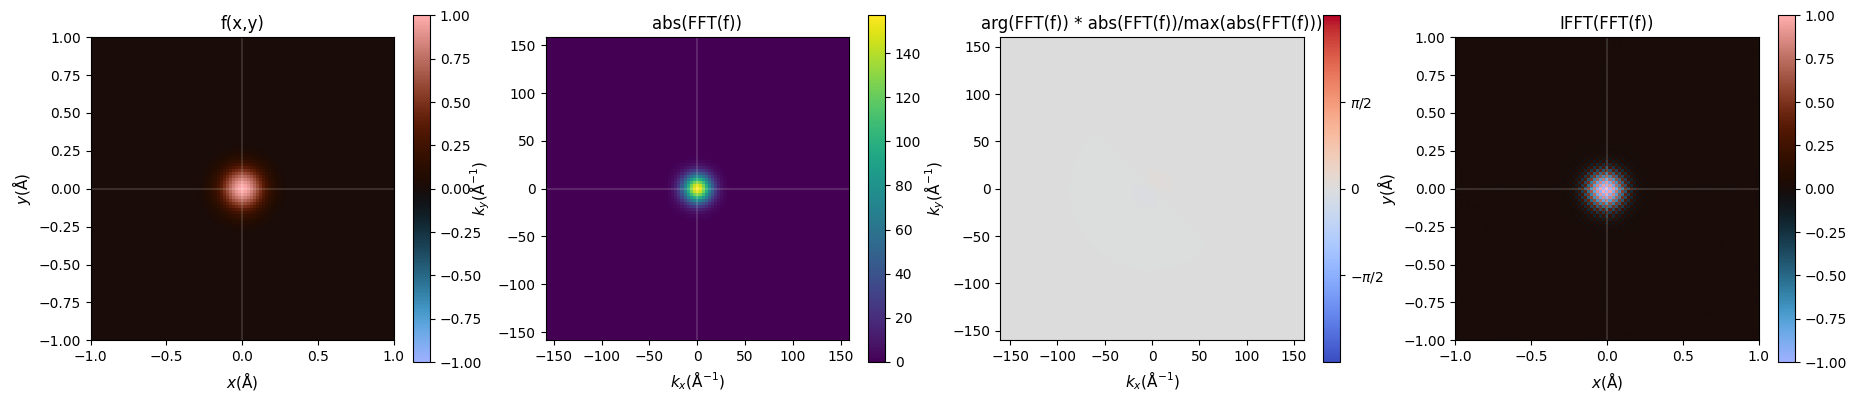

In [951]:
dx_image = 0.0
dy_image = 0.0

f = gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

### Smaller is bigger

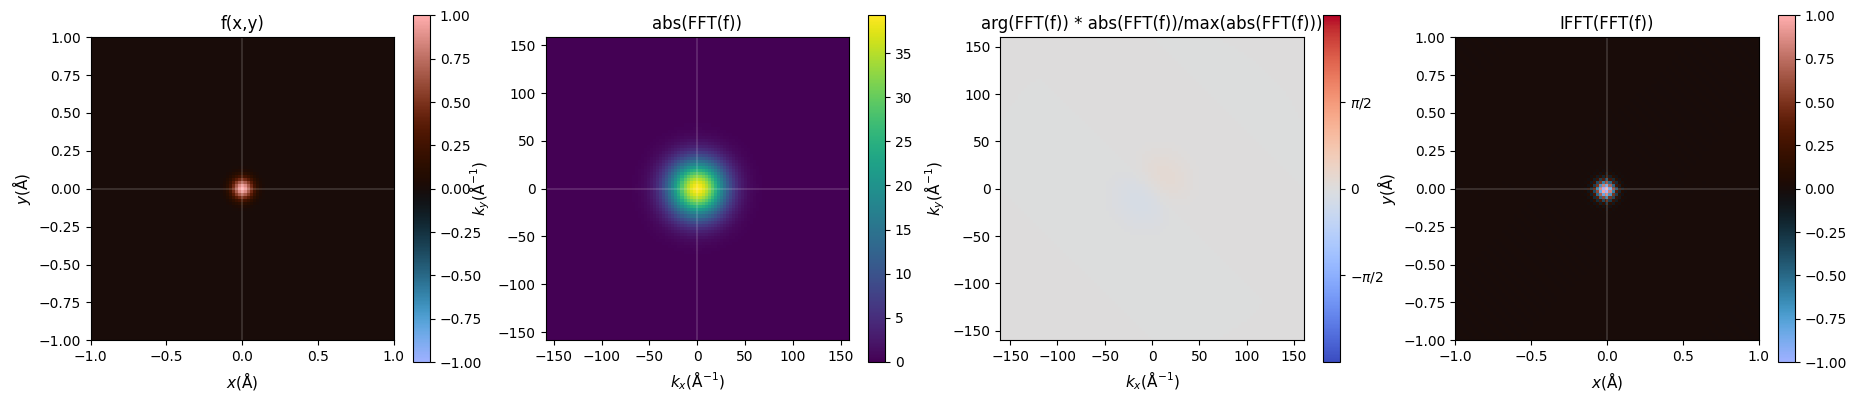

In [952]:
dx_image = 0.0
dy_image = 0.0

f = gaussian(X, Y, dx_image, dy_image, sigma=0.5*sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

## Off-center
- still centered at FFT, instead gain a phase as a plane wave

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


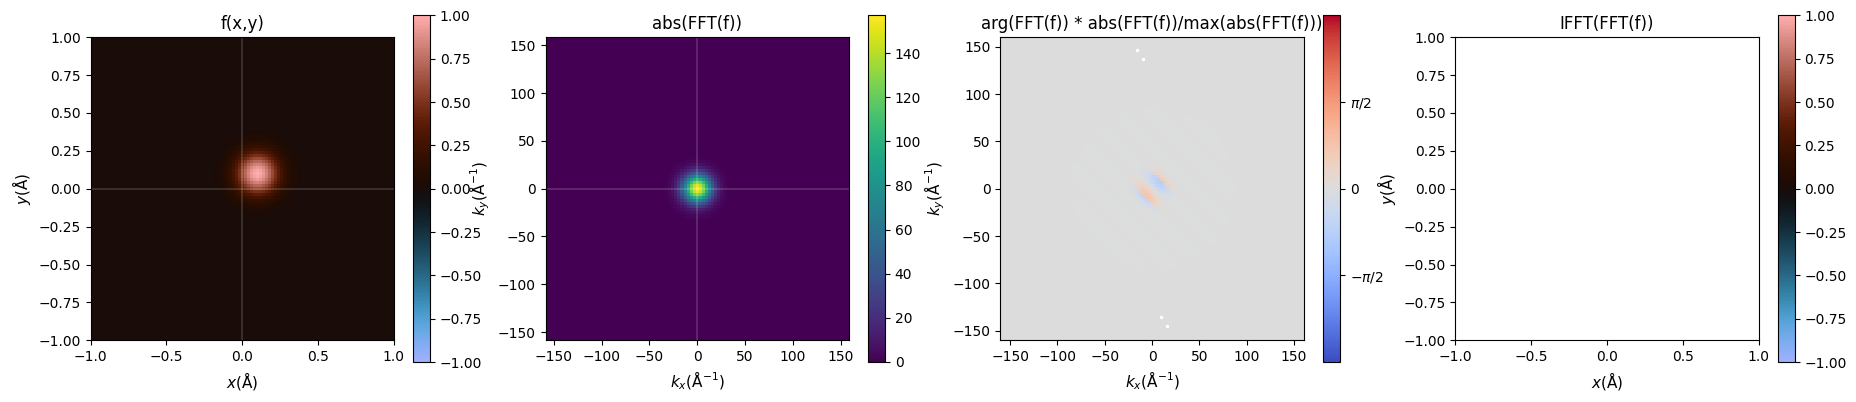

In [953]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


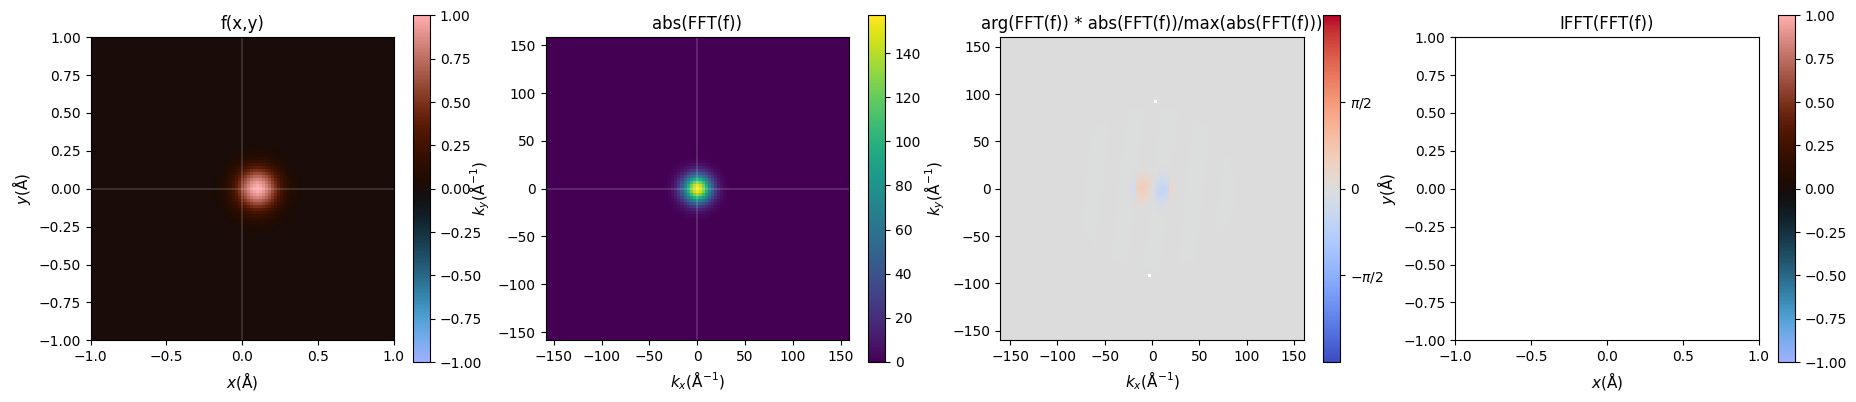

In [954]:
dx_image = 0.1
dy_image = 0.00

f = gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

## Two objects displaced relative to each other
- plane-wave phases interfere and create a plane-wave modulation in amplitude

### Close to each other
- almost like an ellipsoid (in the limit when they are very close basically an ellipsoid in both the real and reciprocal space)

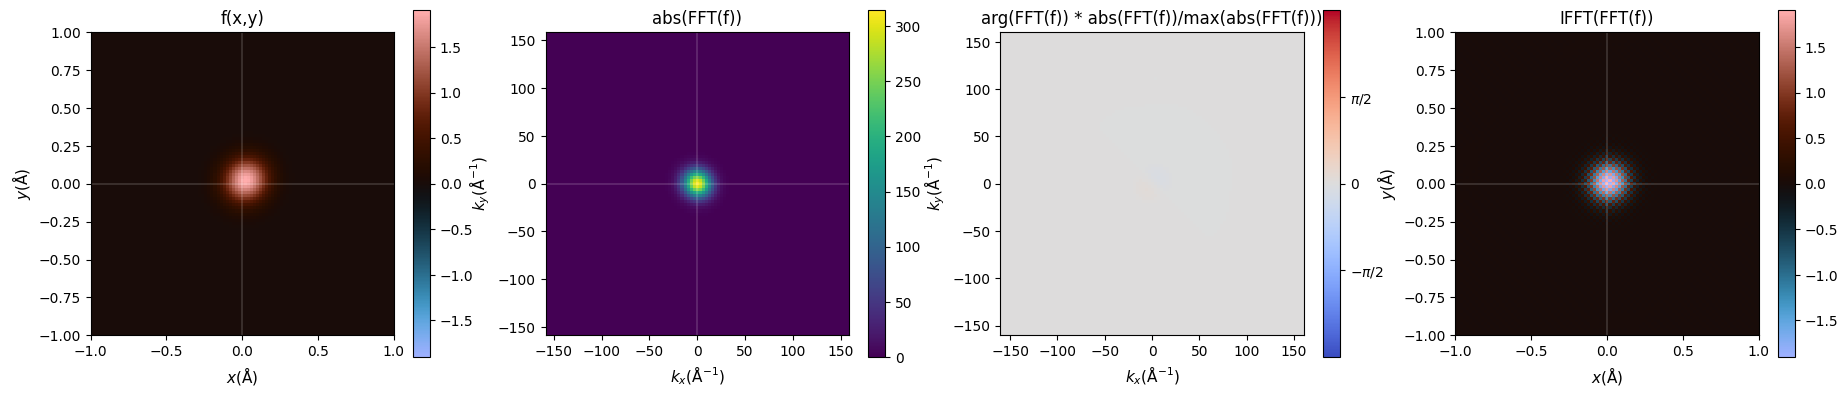

In [955]:
dx_image = 0.045
dy_image = 0.045

f = gaussian(X, Y, 0, 0, sigma) + gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

### Far from each other

#### Both positive
- maxima at origin in FFT

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


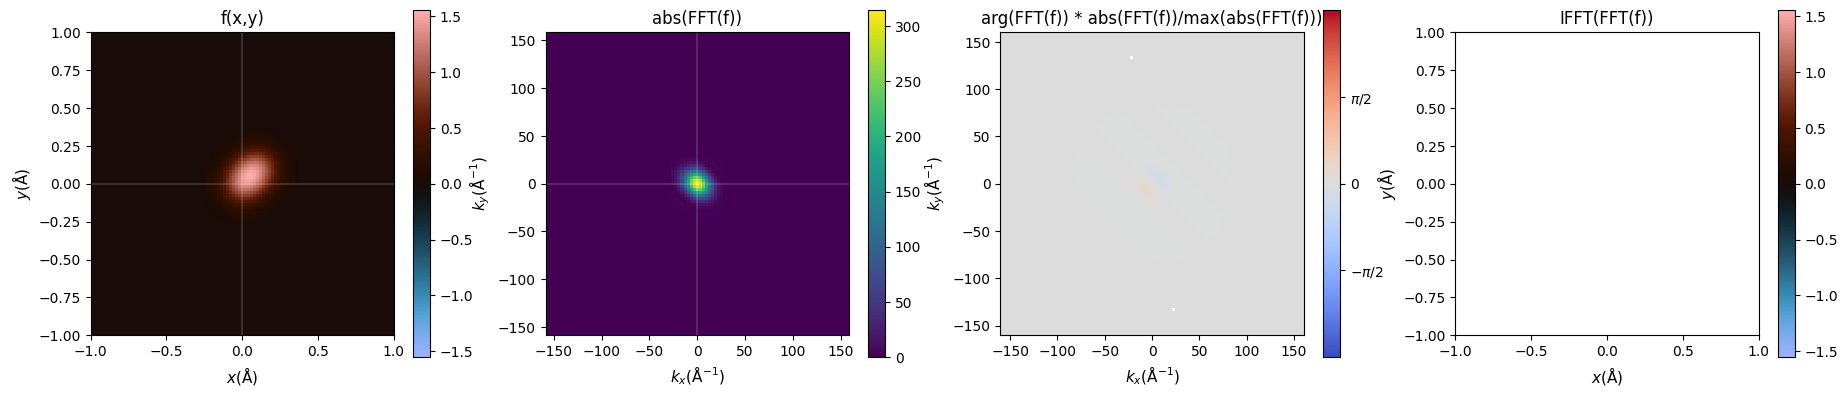

In [956]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, 0, 0, sigma) + gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Positive and negative
- minima at origin

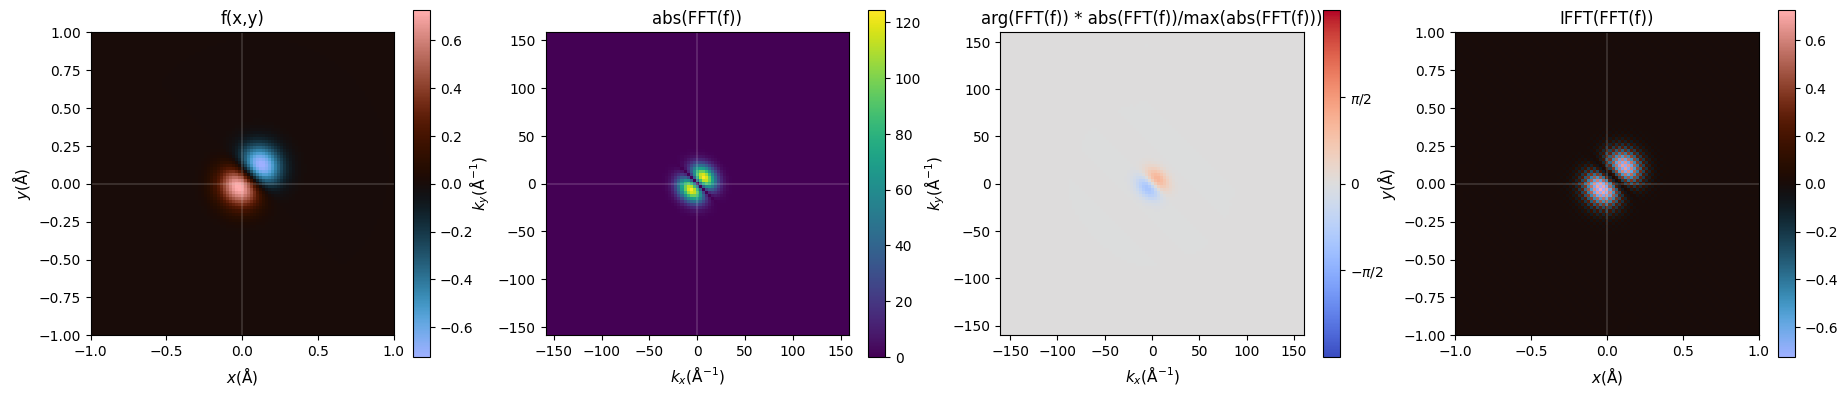

In [957]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, 0, 0, sigma) - gaussian(X, Y, dx_image, dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally
- global phase changes, their interference not

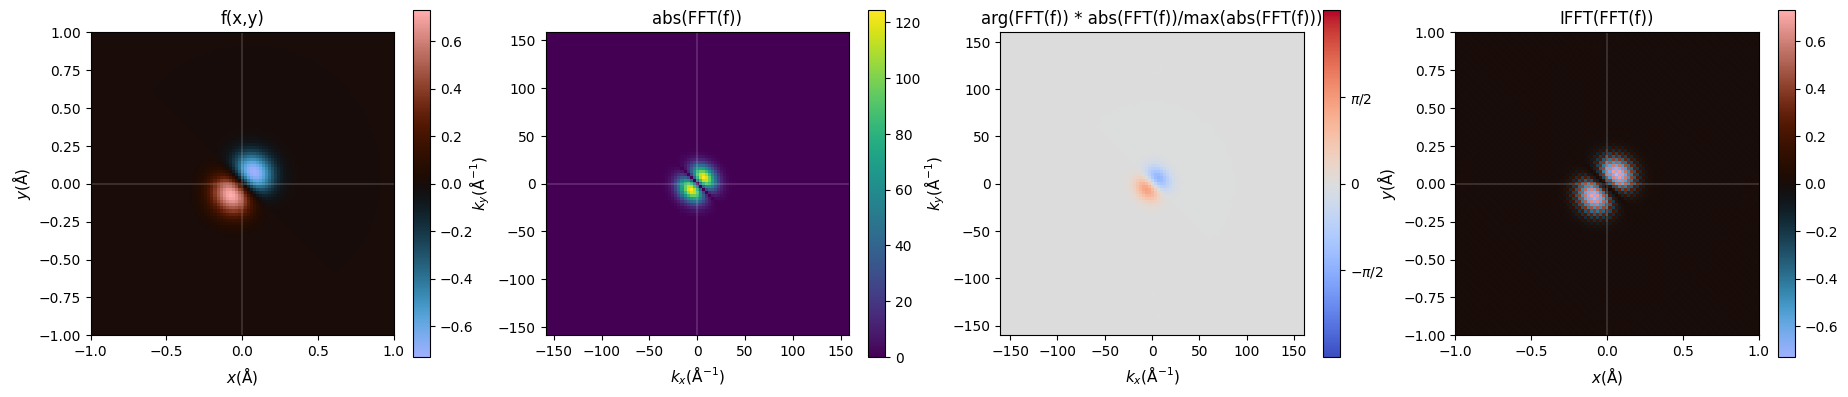

In [958]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, -dx_image/2, -dy_image/2, sigma) - gaussian(X, Y, dx_image/2, dy_image/2, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally further
- global phase changes, their interference not
    - half the period

/tmp/ipykernel_1353791/3632906505.py:6: RuntimeWarning: invalid value encountered in divide
  F_phase = np.arctan(np.imag(F)/np.real(F))


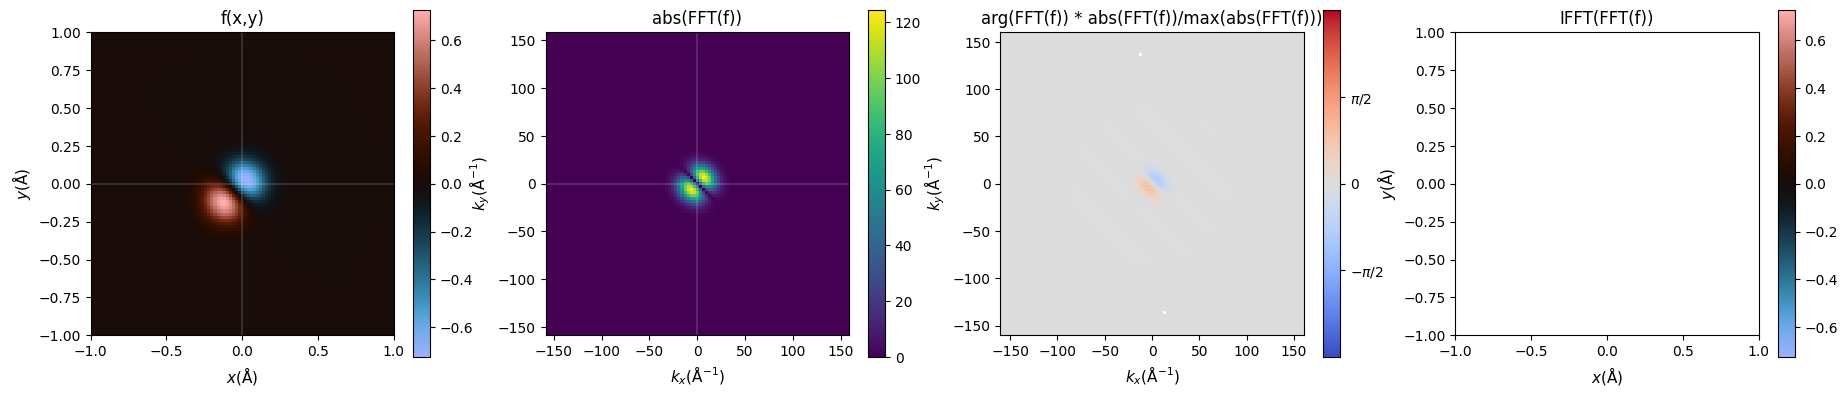

In [959]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, -dx_image, -dy_image, sigma) - gaussian(X, Y, 0, 0, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

#### Shifted globally even further
- global phase changes, their interference not
    - quarter the period

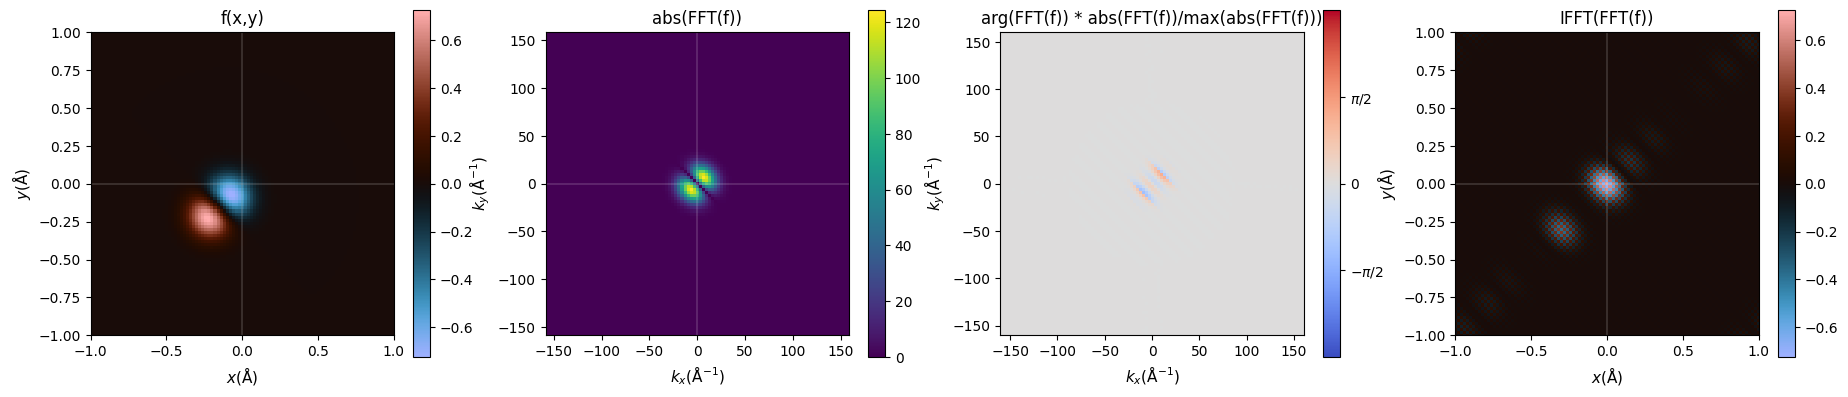

In [960]:
dx_image = 0.1
dy_image = 0.1

f = gaussian(X, Y, -2*dx_image, -2*dy_image, sigma) - gaussian(X, Y, -dx_image, -dy_image, sigma)
F_amp, F_phase = fourier_transform(f)
plot(f, (F_amp, F_phase), X, Y)

## Resolution of real space

## 

In [961]:
def analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show, sigma=0.08):
    x = np.linspace(-abs(L_real)/2, abs(L_real)/2, N_real, dtype=np.float64)
    y = np.linspace(-abs(L_real)/2, abs(L_real)/2, N_real, dtype=np.float64)
    X, Y = np.meshgrid(x, y)
    f = np.zeros_like(gaussian(X, Y, 0, 0, sigma))
    for i in range(-N_images//2,N_images//2+1):
        for j in range(-N_images//2,N_images//2+1):
            f += gaussian(X, Y, dx_image*i, dy_image*j, sigma)
    F_amp, F_phase = fourier_transform(f)
    plot(f, (F_amp, F_phase), X, Y, x_lim=L_real_show, kx_lim=K_rec_show, interpolate_plot=False)

### Our starting point

In [962]:
# plot limits
L_real_show = 1.6         # (Angstrom)
K_rec_show = 160          # (2*pi/Angstrom)

# images
N_images = 0
dx_image = 1.0             # (Angstrom); displacement of images
dy_image = 1.0            # (Angstrom); displacement of images

In [ ]:
L_real = 1.0   # (Angstrom)
N_real = 21    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

### Only increasing _resolution_ of real space while keeping its size only increases the _size_ of the reciprocal space, but its resolution remains the same (because the scale of kx and ky axes also changed - see carefully - you are zoomed out in reciprocal space)

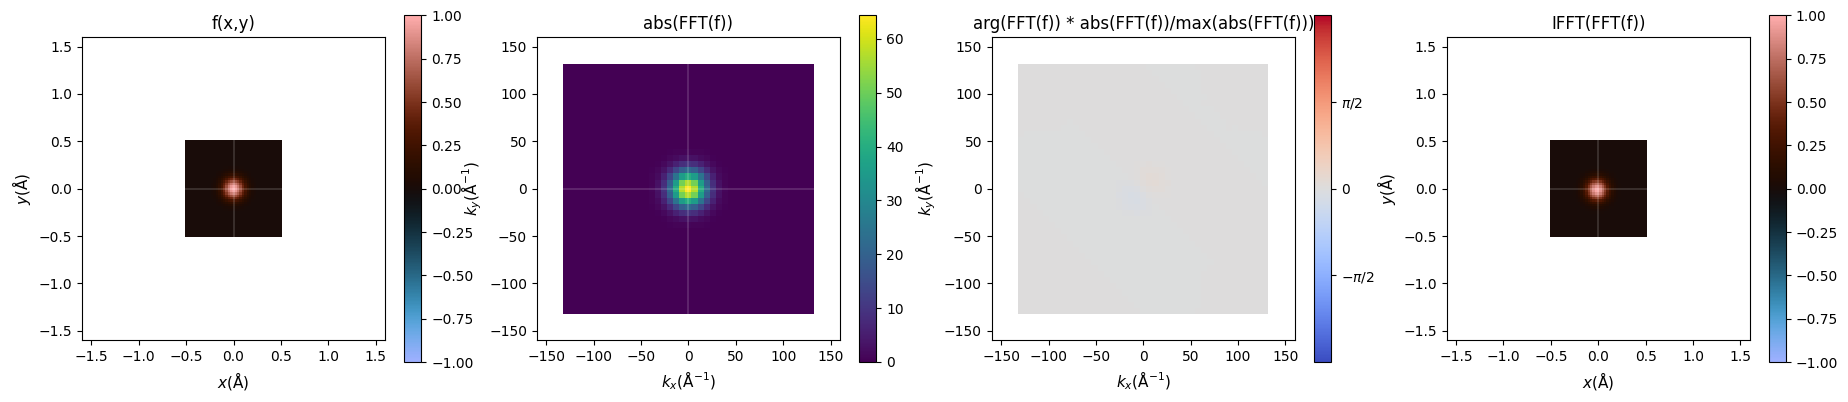

In [ ]:
L_real = 1.0   # (Angstrom)
N_real = 41    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

### Increasing _size_ of real space does increase the _resolution_ of the reciprocal space, but also shrinks it (because we did not increase the sampling of the real space)

$\Delta k = \frac{2 \pi}{L}$

$K = \Delta k N = \frac{2 \pi}{L} N$)

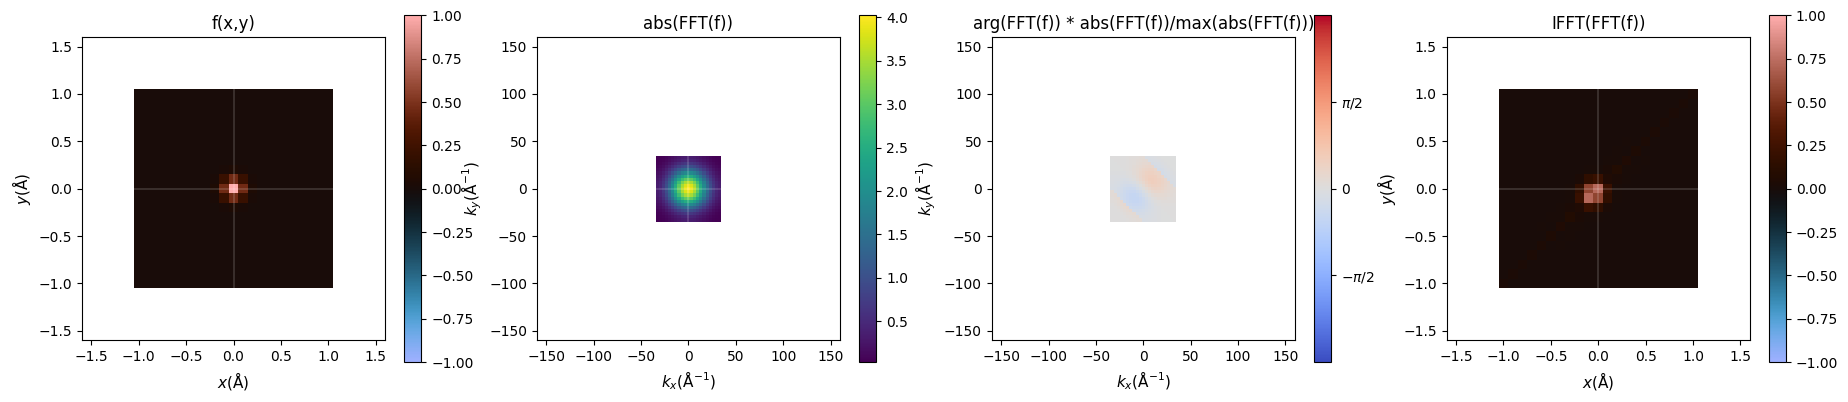

In [ ]:
L_real = 2.0   # (Angstrom)
N_real = 21    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

### To increase resolution of your reciprocal space, while keeping the dimensions the same, increase the resolution and also the _size_ of the real space by the same factor

... compare the original

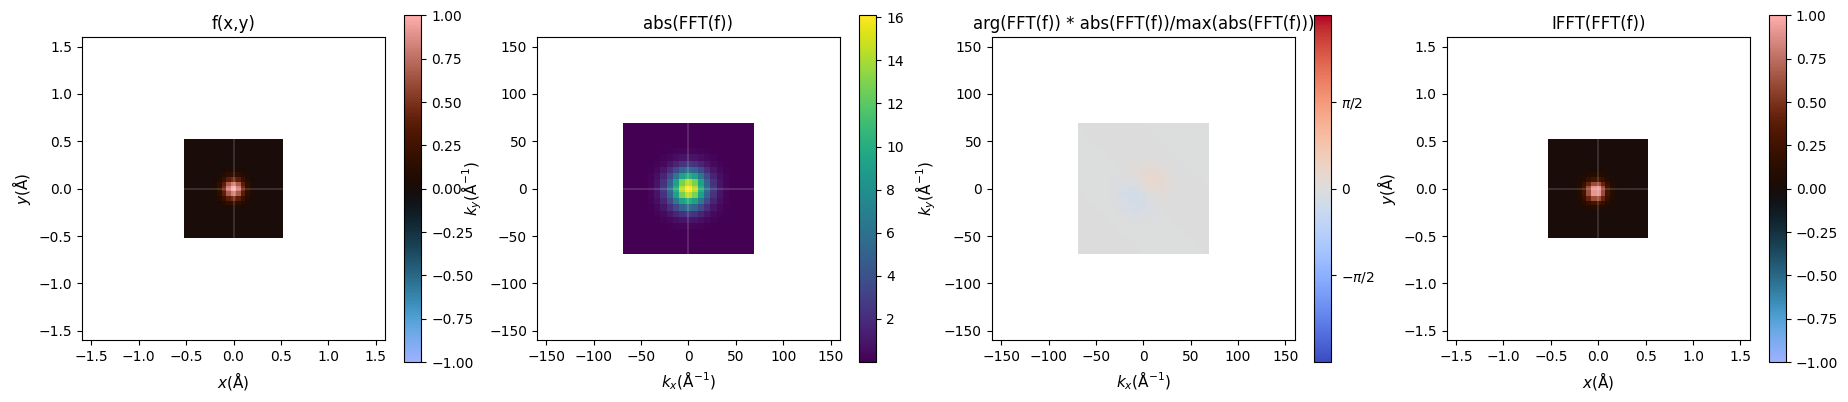

In [ ]:
L_real = 1.0   # (Angstrom)
N_real = 21    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

... with the scaled

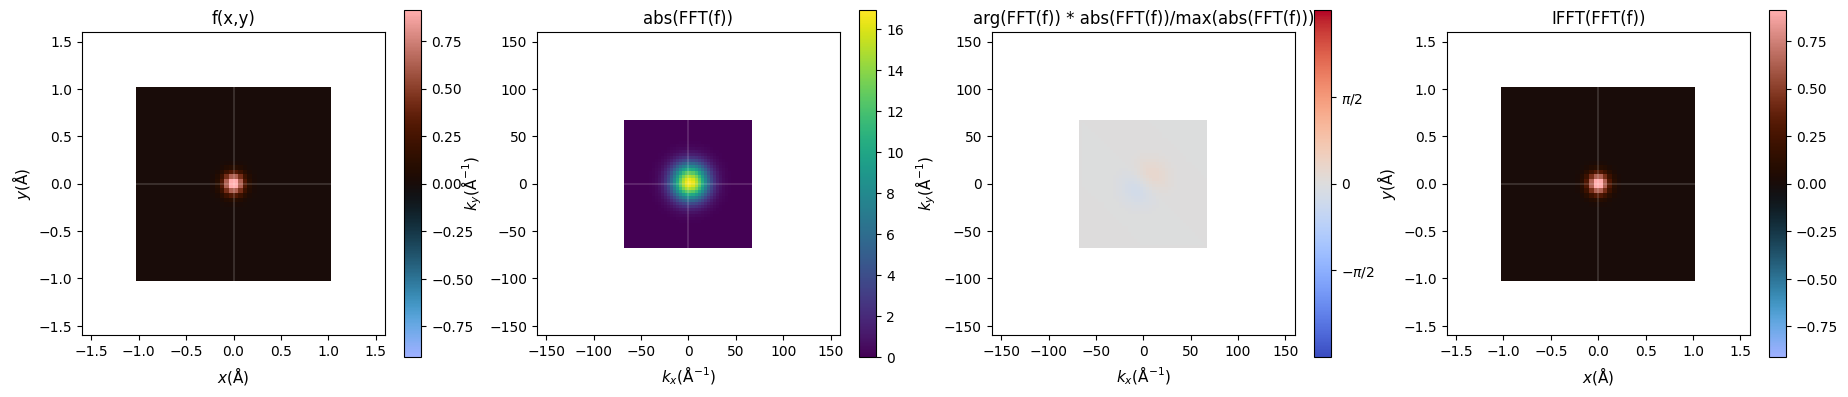

In [ ]:
scale_real_space = 2       # scale simultaneously L_real and N_real

L_real = 1.0 * scale_real_space    # (Angstrom)
N_real = 21  * scale_real_space    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

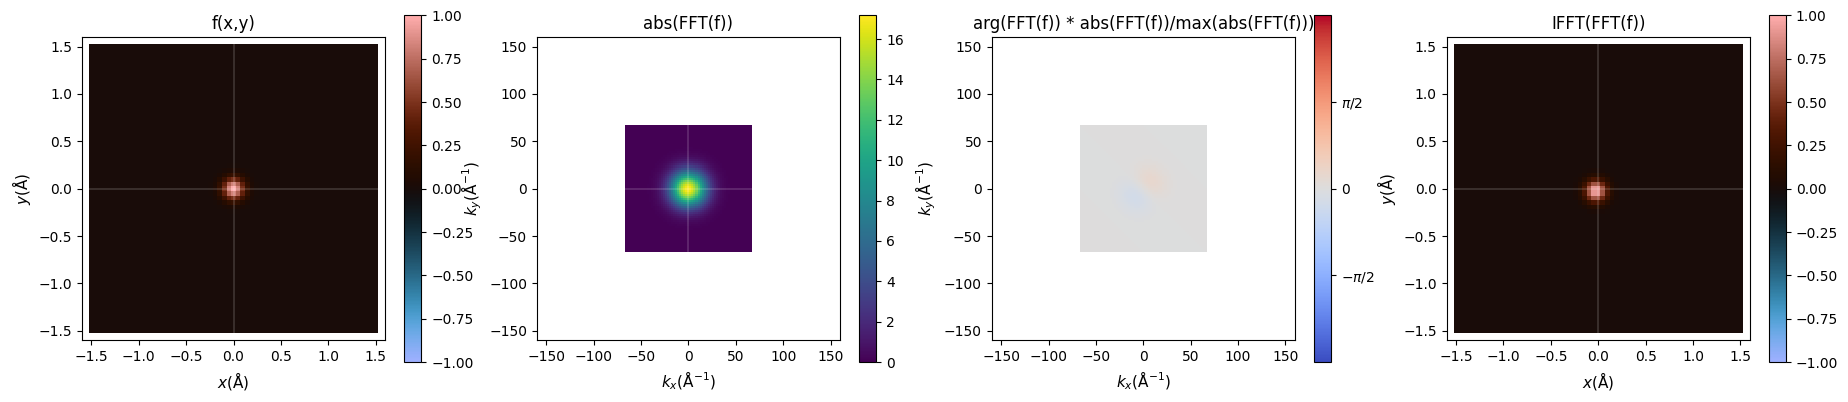

In [ ]:
scale_real_space = 3       # scale simultaneously L_real and N_real

L_real = 1.0 * scale_real_space    # (Angstrom)
N_real = 21  * scale_real_space    # sampling of real space

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)

### Creating replicas doesn't help - in fact it kills the signal away from   _integer_ * 2 pi / d_replica

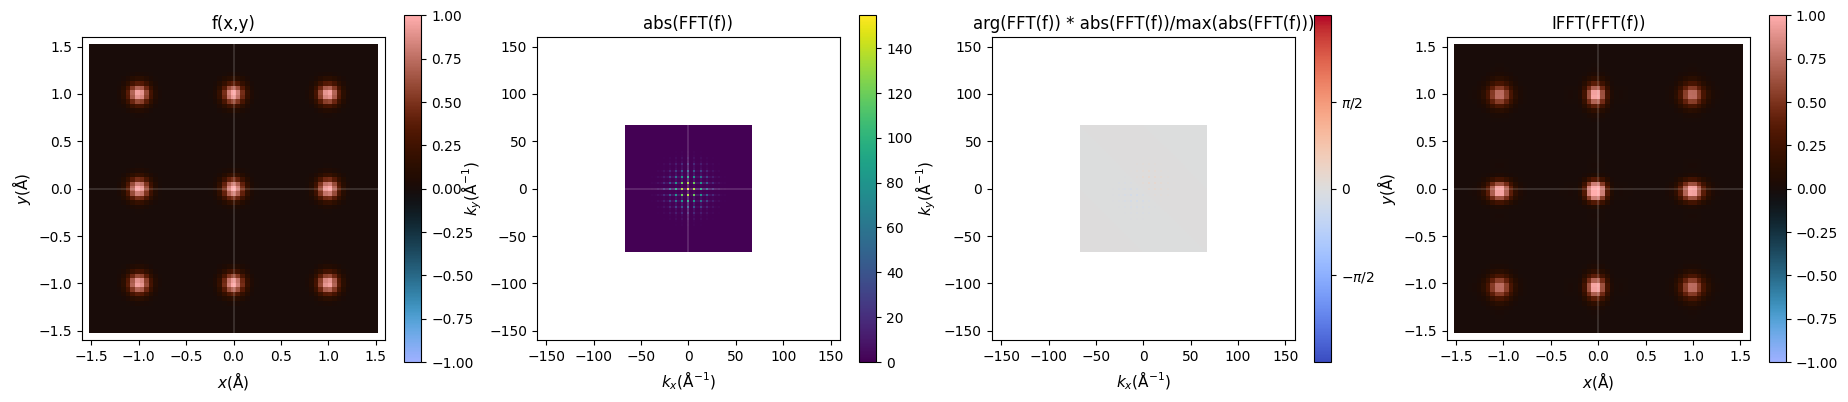

In [ ]:
scale_real_space = 3       # scale simultaneously L_real and N_real

L_real = 1.0 * scale_real_space    # (Angstrom)
N_real = 21  * scale_real_space    # sampling of real space

N_images = 4

analyze_fourier_behaviour(L_real, N_real, N_images, dx_image, dy_image, L_real_show, K_rec_show)